In [2]:
#HEART ATTACK PROBABILITY ANALYSIS USING LOGISTIC REGRESSION MACHINE LEARNING MODEL

In [87]:
# Import dependency modules
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
#define relative filepath for dataset:
heartFile= "resources/heart.csv"
#open csv to pandas dataframe:
heartData=pd.read_csv(heartFile)

In [8]:
# preview dataset:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#get info on data:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [68]:
#define X and y:
y=heartData.target.values.ravel()
X=heartData.drop("target", axis=1)
print(X.shape, y.shape)

(303, 13) (303,)


In [69]:
# test train split the data:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [70]:
#Scale the data using Standard Scaler, do not scale y data as it is binomial categories
from sklearn.preprocessing import StandardScaler

In [71]:
x_scaler= StandardScaler().fit(x_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled= x_scaler.transform(x_test)

In [72]:
#fit logistic model to the train data:
from sklearn.linear_model import LogisticRegression

In [73]:
# small dataset so use solver='liblinear'
classifier=LogisticRegression()
classifier.fit(x_train_scaled, y_train)

LogisticRegression()

In [74]:
# validate training model on train vs test data accuracy:
print(f"Training Data Score: {classifier.score(x_train_scaled, y_train)}")
print(f"Test Data Score: {classifier.score(x_test_scaled, y_test)}")

Training Data Score: 0.8590308370044053
Test Data Score: 0.881578947368421


In [75]:
# The mean accuracy of default model is good, 
# but this is a diagnostic test so we dont want a lot of false positives or negatives.
# Lets look at some additional metrics
# first lets define y_true and y_predicted
y_true=y_test
y_predicted=classifier.predict(x_test_scaled)


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
print(f"Precision: {precision_score(y_true, y_predicted)}")
print(f"Recall {recall_score(y_true, y_predicted)}")
print(f"ROC_AUC_SCORE {roc_auc_score(y_true, y_predicted)}")
print(f"Classification Report: {classification_report(y_true, y_predicted)}")

Precision: 0.8809523809523809
Recall 0.9024390243902439
ROC_AUC_SCORE 0.8797909407665506
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [101]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predicted)))

Confusion Matrix : 
[[30  5]
 [ 4 37]]


In [77]:
# Overall precision and recall could be better considering that this is a diagnostic test.
# Lets try tuning the hyper parameters using GridSeach
from sklearn.model_selection import GridSearchCV

In [131]:
#define all parameters for model using gridsearch, because nfeatures<< nsamples using dual= False, keeping default value of intercept_scaling =1
# since using liblinear, penalty cannot be none, also using default max_iter unless see a failure.
# lets use f1 as model score to minimize innaccurate results

param_grid={'penalty': ['l1', 'l2', 'elasticnet'], 
                        'tol':[.000005, .00001, .00005], 
                        'C':[.00001,.0001, .001, .01, .1, 1], 
                        'class_weight':['balanced', None], 
                        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid=GridSearchCV(classifier, param_grid, verbose=3, scoring = 'f1')

In [132]:
#  fit the gridsearch tuner to the data:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.776, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.808, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.868, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.808, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.885, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[

[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-06 
[CV]  C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-06, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05 
[CV]  C=1e-05, class_weight=balanced, penalty=elasticnet, solver=saga, tol=1e-05, score=nan, total=   0.0s
[CV] C=1e-05, class_weight=balanced, penalty=elasticnet, sol

[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06, score=0.704, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06 .
[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06, score=0.696, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06 .
[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06, score=0.714, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06 .
[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=5e-06, score=0.714, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=1e-05 .
[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=1e-05, score=0.704, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=1e-05 .
[CV]  C=1e-05, class_weight=None, penalty=l2, solver=lbfgs, tol=1e-05, score=0.704, total=   0.0s
[CV] C=1e-05, class_weight=None, penalty=l2, solver=lbfgs

[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=1e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-05, 

[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.808, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.868, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.808, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.885, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.776, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=1e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=lbfgs, tol=1e-05, score=0.808, total=   0.0s
[CV] C=

[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05, score=0.885, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05 
[CV]  C=0.0001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05, score=0.776, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.0001, class_weight=balanc

[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ..
[CV]  C=0.0001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV]

[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.808, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.885, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.808, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.885, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.776, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05 
[CV]  C=0.0001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05, score=0.808, total=   0.0s
[CV] C=

[CV]  C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05 
[CV]  C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05 
[CV]  C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05 
[CV]  C=0.0001, class_weight=None, penalty=elasticnet, solver=liblinear, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06 
[CV]  C=0.0001, class_weight=None, penalty=elasticnet, sol

[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.808, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.885, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.824, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.868, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, s

[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06, score=0.868, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06, score=0.808, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06, score=0.885, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=5e-06, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.824, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.001, class_weight=balanced, penalty=l2, solver=

[CV]  C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ...
[CV]  C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ...
[CV]  C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ...
[CV]  C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05 ...
[CV]  C=0.001, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ..
[CV]  C=0.001, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.704, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ..
[CV]  C

[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.885, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06 
[CV]  C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=5e-06, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05 
[CV]  C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05, score=0.824, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05 
[CV]  C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05, score=0.868, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05 
[CV]  C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05, score=0.808, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2, solver=liblinear, tol=1e-05 
[CV]  C=0.001, class_weight=None, penalty=l2, 

[CV]  C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=0.001, class_weight=None, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.

[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.885, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.778, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.885, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.824, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.885, total=   0.0s
[

[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05, score=0.885, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05 
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=elasticnet, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=balanced, penalty=elasticnet

[CV]  C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05, score=0.704, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05 ...
[CV]  C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05, score=0.704, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05 ...
[CV]  C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05, score=0.696, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05 ...
[CV]  C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05, score=0.714, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05 ...
[CV]  C=0.01, class_weight=None, penalty=l1, solver=saga, tol=5e-05, score=0.714, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=0.01, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-06, score=0.830, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=newton-cg, 

[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06, score=0.873, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06 ....
[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06, score=0.793, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06 ....
[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06, score=0.836, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06 ....
[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=5e-06, score=0.852, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=1e-05 ....
[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=1e-05, score=0.830, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=1e-05 ....
[CV]  C=0.01, class_weight=None, penalty=l2, solver=sag, tol=1e-05, score=0.873, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2, solver=sag, tol=1e-05 ....
[CV]

[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=5e-06 
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=lbfgs, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solve

[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.902, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.778, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.885, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-05, score=0.766, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs, tol=5e-06, score=0.776, total=   0.0s
[CV]

[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.902, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.778, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.885, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=1e-05, score=0.766, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05 
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, tol=5e-05, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solv

[CV] C=0.1, class_weight=None, penalty=l1, solver=sag, tol=5e-05 .....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=sag, tol=5e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.889, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.800, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.868, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06 ....
[CV]  C=0.1, class_weight=None, penalty=l1, solver=saga, tol=5e-06, score=0.760, total=   0.0s
[CV] C=

[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06 
[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06 
[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06 
[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=5e-06, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=1e-05 
[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=1e-05 
[CV]  C=0.1, class_weight=None, penalty=elasticnet, solver=sag, tol=1e-05, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None,

[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.766, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.898, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.764, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.885, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06 
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=5e-06, score=0.756, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05 
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, tol=1e-05, score=0.766, total=   0.0s
[CV] C=1, class_we

[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=saga, tol=5e-05, score=nan, total=   0.0s
[CV] C=1, class_weight=None, penalty=l1, solver=newton-cg, tol=5e-06 .
[CV]  C=1, class_weight=None, penalty=l1, solver=newton-cg, tol=5e-06, score=nan, total=   0.0s
[CV] C=1, class_weight=None, penalty=l1, solver=newton-cg, tol=5e-06 .
[CV]  C=1, class_weight=None, penalty=l1, 

[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=1e-05, score=0.766, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05 .
[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05, score=0.792, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05 .
[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05, score=0.902, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05 .
[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05, score=0.764, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05 .
[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05, score=0.868, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05 .
[CV]  C=1, class_weight=None, penalty=l2, solver=newton-cg, tol=5e-05, score=0.766, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=lbfgs, to

[CV]  C=1, class_weight=None, penalty=l2, solver=sag, tol=5e-05, score=0.868, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=sag, tol=5e-05 .......
[CV]  C=1, class_weight=None, penalty=l2, solver=sag, tol=5e-05, score=0.766, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06 ......
[CV]  C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06, score=0.792, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06 ......
[CV]  C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06, score=0.902, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06 ......
[CV]  C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06, score=0.764, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06 ......
[CV]  C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06, score=0.868, total=   0.0s
[CV] C=1, class_weight=None, penalty=l2, solver=saga, tol=5e-06 ......
[CV]  C=1, class_w

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:    5.8s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [5e-06, 1e-05, 5e-05]},
             scoring='f1', verbose=3)

In [133]:
# print the grid search best parameters:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 5e-06}
0.8368469776927812
LogisticRegression(C=0.01, solver='newton-cg', tol=5e-06)


In [134]:
y_grid_predicted= grid.predict(x_test_scaled)

In [135]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_grid_predicted)))

Confusion Matrix : 
[[29  6]
 [ 3 38]]


In [136]:
#Function to plot intuitive confusion matrix 
# CODE BORROWED FROM https://github.com/rohanjoseph93/Python-for-data-science/blob/master/Grid%20Search%20-%20Breast%20Cancer.ipynb
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [127]:
# Compute confusion matrix
cnf_matrix_no_grid = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

<IPython.core.display.Javascript object>


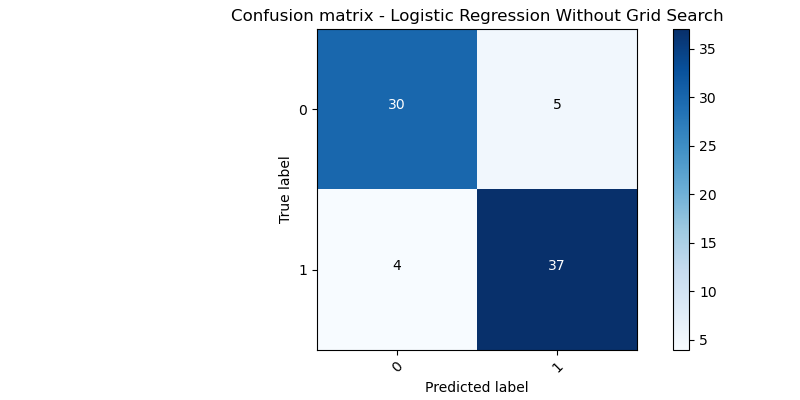

Confusion matrix, without normalization
[[30  5]
 [ 4 37]]


In [128]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix_no_grid, classes=class_names,
                      title='Confusion matrix - Logistic Regression Without Grid Search')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

In [137]:
# Compute confusion matrix
cnf_matrix_grid = confusion_matrix(y_test, y_grid_predicted)
np.set_printoptions(precision=2)

<IPython.core.display.Javascript object>


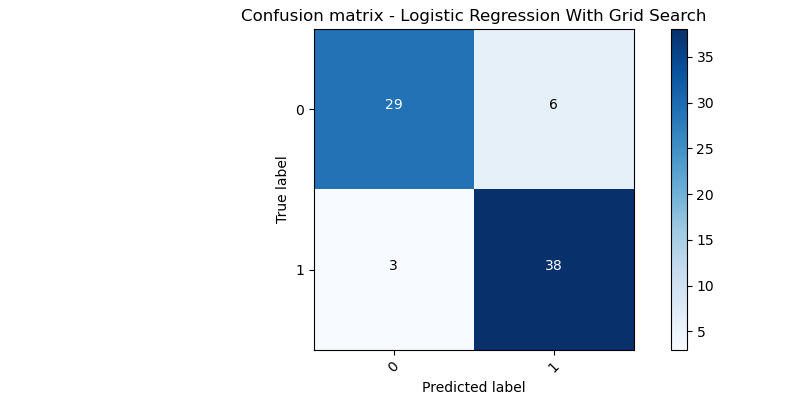

Confusion matrix, without normalization
[[29  6]
 [ 3 38]]


In [139]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix_grid, classes=class_names,
                      title='Confusion matrix - Logistic Regression With Grid Search')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

In [140]:
# THE GRID SEARCH MODEL PERFORMS BETTER WHEN CONSIDERING THAT WE WANT TO MINIMIZE INCORRECT RESULTS, ESPECIALLY FALSE NEGATIVES.
# SO WE WILL CONSIDER THIS OUR BEST MODEL LOGISTIC PREDICTIONS.